In [13]:
"""
CSCI3230 / ESTR3108 2021-22 First Term Assignment 4
I declare that the assignment here submitted is original except for source
material explicitly acknowledged, and that the same or closely related material
has not been previously submitted for another course. I also acknowledge that I
am aware of University policy and regulations on honesty in academic work, and
of the disciplinary guidelines and procedures applicable to breaches of such
policy and regulations, as contained in the following websites.
University Guideline on Academic Honesty:
http://www.cuhk.edu.hk/policy/academichonesty/
Faculty of Engineering Guidelines to Academic Honesty:
http://www.erg.cuhk.edu.hk/erg-intra/upload/documents/ENGG_Discipline.pdf
Student Name: CHOI, Ka Hou
Student ID :  1155135747
"""

'\nCSCI3230 / ESTR3108 2021-22 First Term Assignment 4\nI declare that the assignment here submitted is original except for source\nmaterial explicitly acknowledged, and that the same or closely related material\nhas not been previously submitted for another course. I also acknowledge that I\nam aware of University policy and regulations on honesty in academic work, and\nof the disciplinary guidelines and procedures applicable to breaches of such\npolicy and regulations, as contained in the following websites.\nUniversity Guideline on Academic Honesty:\nhttp://www.cuhk.edu.hk/policy/academichonesty/\nFaculty of Engineering Guidelines to Academic Honesty:\nhttp://www.erg.cuhk.edu.hk/erg-intra/upload/documents/ENGG_Discipline.pdf\nStudent Name: CHOI, Ka Hou\nStudent ID :  1155135747\n'

In [14]:
# !pip install torch torchvision numpy matplotlib

import torch
import torchvision
from torch import nn
import torch.nn.functional as func
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Train transformation
train_transform = transforms.Compose([
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])
# Test transformation
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

# Download training data from open datasets.
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=train_transform,
)

# Download test data from open datasets.
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=test_transform,
)

Files already downloaded and verified
Files already downloaded and verified


Shape of X [N, C, H, W]:  torch.Size([256, 3, 32, 32])
Shape of y:  torch.Size([256]) torch.int64


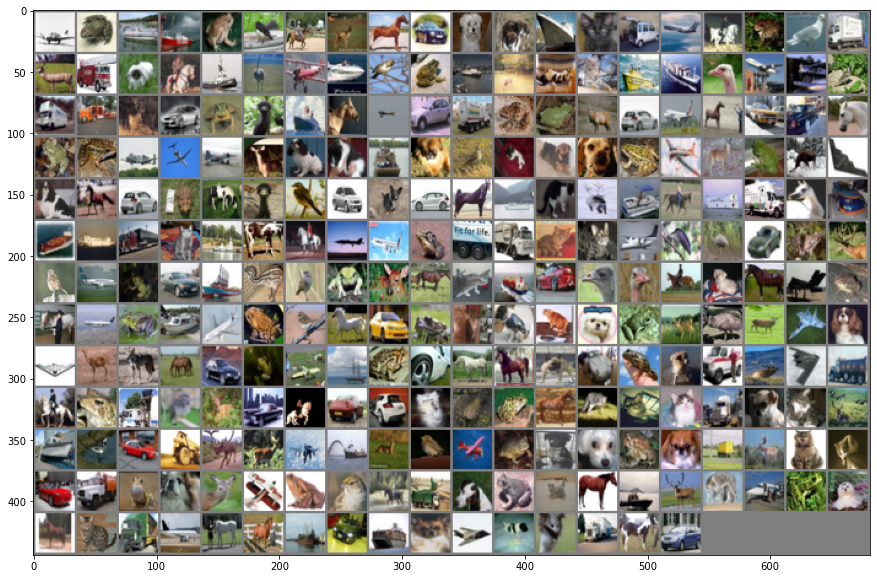

In [16]:
# Training batch size
batch_size = 256

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=2)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(15,15))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Each batch tensor shape
for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    
    imshow(torchvision.utils.make_grid(X, nrow=20))
    
    break

In [17]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), # output: 32 * 16 * 16
            nn.Dropout(0.2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2), # output: 64 * 8 * 8
            nn.Dropout(0.3),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2), # output: 128 * 4 * 4
            nn.Dropout(0.4),

            nn.Flatten(), 
            nn.Linear(128*4*4, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.cnn(x)
    
model = NeuralNetwork().to(device)
# for X, y in test_dataloader:
#     output = model(X)
#     break
print(model)

Using cuda device
NeuralNetwork(
  (cnn): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.2, inplace=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Dropo

In [18]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# SGD Optimizer
sgd_optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, weight_decay=5e-4, momentum=0.9)

# Adam Optimizer
adam_optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def adam_optm(lrate):
    return torch.optim.Adam(model.parameters(), lr=lrate)

# RMSprop
rmsprop_optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-2, alpha=0.9)

In [19]:
train_losses_list = []
train_accuracy_list = []

In [20]:

# Training function
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    # Turn on training mode
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # record loss
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    train_loss /= len(dataloader)
    correct /= size
    
    train_losses_list.append(train_loss)
    train_accuracy_list.append(correct)
    
    print(f" Train accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f}")

In [21]:
test_losses_list = []
test_accuracy_list = []

In [22]:
# Test function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    
    # Turn on evalution mode
    model.eval()
    test_loss, correct = 0, 0
    
    # Turn off gradient descent
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            
            # record loss
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    
    test_losses_list.append(test_loss)
    test_accuracy_list.append(correct)
    
    print(f" Test accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}")

In [23]:
import time

In [24]:
# Total training epochs
epochs = 200

for t in range(epochs):
    lr = 1e-3 / (((t - 50) // 25) if t > 75 else 1)
    print('\n', "=" * 15, "Epoch", t + 1, "=" * 15, time.ctime())
    train(train_dataloader, model, loss_fn, adam_optm(lr))
    test(test_dataloader, model, loss_fn)
    
print(" Done!")


 =============== Epoch 1 =============== Sat Feb 12 00:13:45 2022
 Train accuracy: 42.5%, Avg loss: 1.577617
 Test accuracy: 56.2%, Avg loss: 1.223590

 =============== Epoch 2 =============== Sat Feb 12 00:14:07 2022
 Train accuracy: 56.5%, Avg loss: 1.212110
 Test accuracy: 64.3%, Avg loss: 1.000475

 =============== Epoch 3 =============== Sat Feb 12 00:14:28 2022
 Train accuracy: 63.4%, Avg loss: 1.028630
 Test accuracy: 72.0%, Avg loss: 0.786960

 =============== Epoch 4 =============== Sat Feb 12 00:14:49 2022
 Train accuracy: 67.8%, Avg loss: 0.914874
 Test accuracy: 74.9%, Avg loss: 0.708273

 =============== Epoch 5 =============== Sat Feb 12 00:15:11 2022
 Train accuracy: 70.0%, Avg loss: 0.850110
 Test accuracy: 77.1%, Avg loss: 0.658564

 =============== Epoch 6 =============== Sat Feb 12 00:15:33 2022
 Train accuracy: 72.2%, Avg loss: 0.791957
 Test accuracy: 78.6%, Avg loss: 0.622080

 =============== Epoch 7 =============== Sat Feb 12 00:15:55 2022
 Train accuracy: 73.6

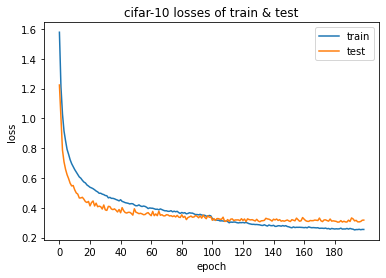

In [25]:
plt.plot(train_losses_list, label='train')
plt.plot(test_losses_list, label='test')
plt.xticks(range(0,len(train_losses_list), 20))
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('cifar-10 losses of train & test')
plt.savefig('cifar-10_losses.png')

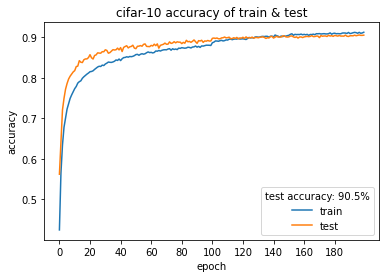

In [26]:
plt.plot(train_accuracy_list, label='train')
plt.plot(test_accuracy_list, label='test')
plt.xticks(range(0,len(train_accuracy_list), 20))
plt.legend(title=f'test accuracy: {(100*test_accuracy_list[len(test_accuracy_list)-1]):>0.1f}%')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('cifar-10 accuracy of train & test')
plt.savefig('cifar-10_accuracy.png')

In [27]:
# Saving model weights
# torch.save(model)
torch.save(model.state_dict(), "model.pth")
print(" Saved PyTorch Model State to model.pth")

 Saved PyTorch Model State to model.pth


In [28]:
# Build the network
model = NeuralNetwork()

# Load trained weights
# .pth pt pkl pth.tar
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [29]:
# 10 Classes
classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

# Evaluation mode
model.eval()

# Get one sample
x, y = torch.tensor(test_data.data[0]).float().unsqueeze(0), test_data.targets[0]
x = x.permute(0, 3, 1, 2)
print(x.shape)
# x, y = test_data.data[0], test_data.targets[1]

# Turn off gradient descent
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f' Predicted: "{predicted}", Actual: "{actual}"')

torch.Size([1, 3, 32, 32])
 Predicted: "Dog", Actual: "Cat"
